In [1]:
import cv2
from matplotlib import pyplot as plt
from lane_detection import *
from lane_following import *

In [2]:
cap=cv2.VideoCapture("AUV_Vid.mkv")

ret, frame=cap.read()
count=0
frequency=150


In [3]:
#plt.imshow(frame)

879.3665651273303


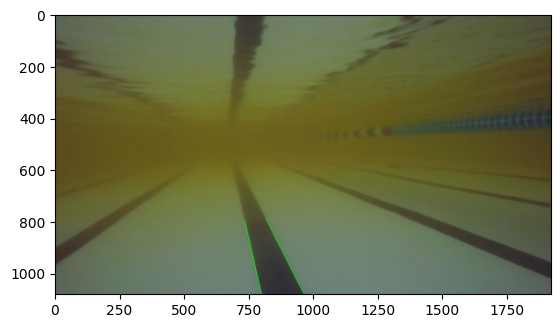

In [4]:
c = frame.copy()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
blurredimg = cv2.GaussianBlur(gray,(9,9),0)
ret,bw_image = cv2.threshold(blurredimg, 140, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(gray,50, 75, apertureSize=3)
line_img_copy = c.copy()
lines = detect_lines(line_img_copy,edges,50,75, 3, 100, 10)
# line_img = lane_detection.draw_lines(line_img_copy,lines)
# plt.imshow(line_img)
lanes = detect_lanes(lines)
lane_img_copy = c.copy()
lane_img = draw_lanes(lane_img_copy,lanes)

a = c.copy()
b = c.copy()
center_lane = get_lane_center(lanes)
center_line = get_center_line(center_lane[0],1080)
center_lane_img = draw_lanes(b, center_lane)
plt.imshow(center_lane_img)

(797.2296819787986, 0)
(961.5034482758621, 0)
(879.3665651273303, 0)


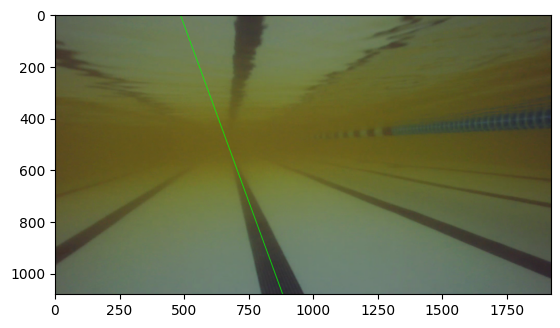

In [5]:

center_line_img = draw_lines(a,[center_line])
plt.imshow(center_line_img)

In [6]:
# sliced = frame[ int(frame.shape[0] / 2) : frame.shape[0]]
# height = sliced.shape[0]
# width = sliced.shape[1]
# while ret:
#     if count%frequency==0:
#         gray = cv2.cvtColor(sliced, cv2.COLOR_BGR2GRAY)
#         blurredimg = cv2.GaussianBlur(gray,(9,9),0)
#         ret,bw_image = cv2.threshold(blurredimg, 50, 75, cv2.THRESH_BINARY)
#         edges = cv2.Canny(bw_image,50, 75, apertureSize=3)
#         lines = detect_lines(sliced,edges,50,75, 3, 100, 10)
#         if len(lines)>1:
#             lanes = detect_lanes(lines)
#             center_lane = get_lane_center(lanes)
#             center_line = get_center_line(center_lane[0])
#             (strafe_direction,turn_direction,turn_in_degrees,direction) = recommend_direction(center_line.get_x_intercept()[0],center_line.get_slope(),center_line,width)
#             text = f"The AUV should move {strafe_direction} and {turn_direction} by {turn_in_degrees} {direction}"

#             frame_img = draw_lines(sliced, [center_line], (0,0,255))
#             frame_img = cv2.putText(sliced, text, (0,50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
#         plt.imshow(frame_img)
#         plt.show()
#     count+=1
#     ret, frame=cap.read()
#     sliced = frame[ int(frame.shape[0] / 2) : frame.shape[0]]